In [32]:
import pandas as pd

raw_path = r"f:/@courseworks/PhysicsExperiments/ThermalResistor/processed_data.csv"

# Read all rows as lists, handling inconsistent columns
with open(raw_path, encoding='utf-8') as f:
    lines = [line.strip() for line in f if line.strip()]

rows = [line.split(',') for line in lines]

# Find the maximum number of columns
max_cols = max(len(row) for row in rows)

# Pad rows so all have the same length
for row in rows:
    row += [''] * (max_cols - len(row))

# Extract variable names and their data
data_dict = {}
for row in rows:
    key = row[0]
    values = row[1:]
    data_dict[key] = values

# Convert to DataFrame (transpose so each variable is a column)
df = pd.DataFrame(data_dict)
df

,t/℃,T/K,1/T (10^-2 K^-1),R_T/Ω,ln R_T,-w/(%·K^-1),N
0,35,308.0,0.32468,1831,7.51262,-18.31,0.0
1,40,313.0,0.31949,1421,7.25912,-14.21,12.0
2,45,318.0,0.31447,1241,7.12367,-12.41,19.5
3,50,323.0,0.3096,1072,6.97728,-10.72,28.4
4,55,328.0,0.30488,929,6.83411,-9.29,40.0
5,60,333.0,0.3003,750.9,6.62127,-7.509,55.9
6,65,338.0,0.29586,640.0,6.46147,-6.4,67.0
7,70,343.0,0.29155,549.0,6.3081,-5.49,79.0
8,75,348.0,0.28736,473.2,6.15952,-4.732,91.0
9,80,353.0,0.28329,411.3,6.01932,-4.113,100.0


# Plotting 1/T vs lnR_T
This cell demonstrates how to plot the variation of $1/T$ with $\ln R_T$ using matplotlib.

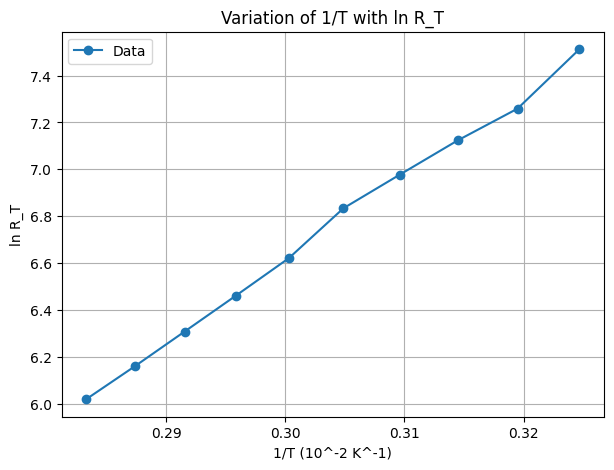

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Extract and clean 1/T and lnR_T columns (skip empty/invalid values)
x = df['1/T (10^-2 K^-1)']
y = df['ln R_T']

# Convert to numeric, coerce errors to NaN, then drop NaNs
x = pd.to_numeric(x, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
mask = (~x.isna()) & (~y.isna())
x = x[mask]
y = y[mask]

plt.figure(figsize=(7,5))
plt.plot(x, y, 'o-', label='Data')
plt.xlabel('1/T (10^-2 K^-1)')
plt.ylabel('ln R_T')
plt.title('Variation of 1/T with ln R_T')
plt.grid(True)
plt.legend()
plt.show()